# Sentiment Analysis of Movie Reviews
In this notebook, we will build a sentiment analysis model that classifies movie reviews as positive or negative using NLP techniques.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import matplotlib.pyplot as plt

# Download stopwords from NLTK
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Load the Dataset
We will load the IMDb dataset containing movie reviews. Make sure to upload the dataset file to your Kaggle notebook.


In [2]:
# Load dataset
df = pd.read_csv('/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv')
df.head()


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [4]:
# Check the columns to identify the text column
print(df.columns)

# Assuming 'Overview' is the relevant text column for sentiment analysis
df['cleaned_overview'] = df['Overview'].apply(preprocess_text)


Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')


## Data Preprocessing
We will clean the text data by removing unnecessary characters and stop words.


In [5]:
# Set of stop words
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stop words
    return text

# Assuming the relevant text column is 'Overview'
df['cleaned_overview'] = df['Overview'].apply(preprocess_text)

# Display the cleaned text column
df[['Overview', 'cleaned_overview']].head()


,Overview,cleaned_overview
0,Two imprisoned men bond over a number of years...,two imprisoned men bond number years finding s...
1,An organized crime dynasty's aging patriarch t...,organized crime dynastys aging patriarch trans...
2,When the menace known as the Joker wreaks havo...,menace known joker wreaks havoc chaos people g...
3,The early life and career of Vito Corleone in ...,early life career vito corleone new york city ...
4,A jury holdout attempts to prevent a miscarria...,jury holdout attempts prevent miscarriage just...


#  Perform Sentiment Analysis

In [6]:
# Function to get sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    return 'positive' if analysis.sentiment.polarity > 0 else 'negative'

# Apply sentiment analysis
df['sentiment'] = df['cleaned_overview'].apply(get_sentiment)

# Display the sentiment results
df[['Overview', 'cleaned_overview', 'sentiment']].head()


,Overview,cleaned_overview,sentiment
0,Two imprisoned men bond over a number of years...,two imprisoned men bond number years finding s...,negative
1,An organized crime dynasty's aging patriarch t...,organized crime dynastys aging patriarch trans...,negative
2,When the menace known as the Joker wreaks havo...,menace known joker wreaks havoc chaos people g...,positive
3,The early life and career of Vito Corleone in ...,early life career vito corleone new york city ...,positive
4,A jury holdout attempts to prevent a miscarria...,jury holdout attempts prevent miscarriage just...,negative


# . Visualize the Sentiment Distribution

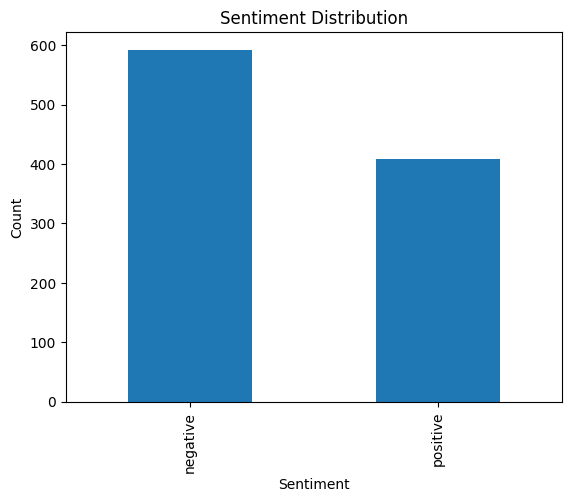

In [7]:
# Plot the sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', title='Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
